<a href="https://colab.research.google.com/github/SmartDogy/ML_Playground/blob/main/Gradient_Boosting_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import plotly.express as px

In [ ]:
a = [165.0, 101.0, 29.0]
b = [137.0, 92.0, 127.0]
c = [472.0, 250.0, 201.0]
d = [192.0, 144.0, 91.0]

In [ ]:
dataset = pd.DataFrame()

In [ ]:
dataset['R&D'] = a
dataset['Administration'] = b
dataset['Marketing'] = c
dataset['Profit'] = d

In [ ]:
px.scatter_3d(x = dataset['R&D'], y = dataset['Marketing'], z = dataset['Administration'], color=dataset['Profit'])

In [ ]:
dataset

,R&D,Administration,Marketing,Profit
0,165.0,137.0,472.0,192.0
1,101.0,92.0,250.0,144.0
2,29.0,127.0,201.0,91.0


1st step is  to calculate mean of actual output which is profit column

In [ ]:
X = dataset[['R&D','Administration','Marketing']].values

In [ ]:
dataset['f0(x)'] = dataset['Profit'].mean()

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x)
0,165.0,137.0,472.0,192.0,142.333333
1,101.0,92.0,250.0,144.0,142.333333
2,29.0,127.0,201.0,91.0,142.333333


2nd step is calculate **residual**

In [ ]:
dataset['ri 1'] = dataset['Profit'] - dataset['f0(x)']

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1
0,165.0,137.0,472.0,192.0,142.333333,49.666667
1,101.0,92.0,250.0,144.0,142.333333,1.666667
2,29.0,127.0,201.0,91.0,142.333333,-51.333333


3rd step is to fit data in a decision tree the data should be X and Y.

X is 3 columns and Y is residual column

[Text(0.5, 0.75, 'x[0] <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 25.667'),
 Text(0.625, 0.5, '  False')]

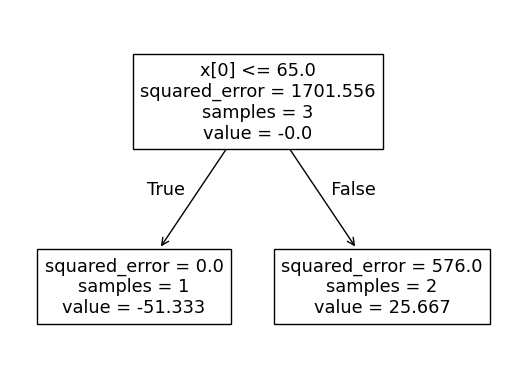

In [ ]:
dt1 = DecisionTreeRegressor(max_depth=1) #max_depth = 1 because our data is very small. In real it should be between 8 - 32
dt1.fit(dataset.iloc[:,0:3].values, dataset['ri 1'].values)
plot_tree(dt1)

Step 4 calculate the residual for 3rd model

Steps to calculate residual:
f1(x) = f0(x) + lr(h1x)

ri2 = y - f1(x)

and the input for 3rd model will be the 1st 3 columns and ri2

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1
0,165.0,137.0,472.0,192.0,142.333333,49.666667
1,101.0,92.0,250.0,144.0,142.333333,1.666667
2,29.0,127.0,201.0,91.0,142.333333,-51.333333


In [ ]:
dataset['h1x'] = dt1.predict(X)

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1,h1x
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333


f1(x) = f0(x) + lr(h1x)

In [ ]:
dataset['f1(x)'] = dataset['f0(x)'].values - (dataset['h1x'])

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1,h1x,f1(x),ri 2,h2x
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,116.666667,49.923333,25.923333
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,116.666667,1.923333,25.923333
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,193.666667,-51.846667,-51.846667


ri 2 = Y - f1(x)

In [ ]:
dataset['ri 2'] = dataset['Profit'] - dataset['f1(x)']

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1,h1x,f1(x),ri 2,h2x
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,116.666667,75.333333,25.923333
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,116.666667,27.333333,25.923333
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,193.666667,-102.666667,-51.846667


In [ ]:
dt2 = DecisionTreeRegressor(max_depth=1)
dt2.fit(X, dataset['ri 2'])

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 65.0\nsquared_error = 5654.222\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = -102.667'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 576.0\nsamples = 2\nvalue = 51.333'),
 Text(0.625, 0.5, '  False')]

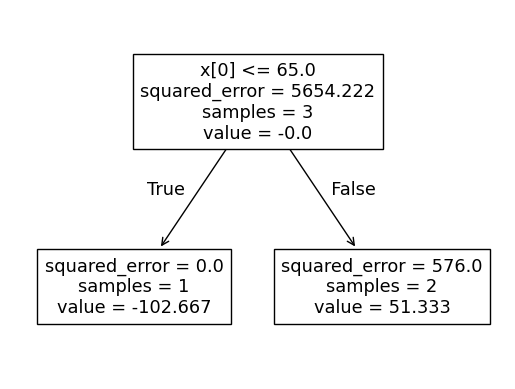

In [ ]:
plot_tree(dt2)

In [ ]:
dataset['h2x'] = dt2.predict(X)

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1,h1x,f1(x),ri 2,h2x
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,116.666667,75.333333,51.333333
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,116.666667,27.333333,51.333333
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,193.666667,-102.666667,-102.666667


In [ ]:
dataset['f2(x)'] = dataset['f1(x)'] + dataset['h2x']

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1,h1x,f1(x),ri 2,h2x,f2(x)
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,116.666667,75.333333,51.333333,168.0
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,116.666667,27.333333,51.333333,168.0
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,193.666667,-102.666667,-102.666667,91.0


In [ ]:
dataset['ri 3'] = dataset['Profit'].values - dataset['f2(x)'].values

In [ ]:
dataset

,R&D,Administration,Marketing,Profit,f0(x),ri 1,h1x,f1(x),ri 2,h2x,f2(x),ri 3
0,165.0,137.0,472.0,192.0,142.333333,49.666667,25.666667,116.666667,75.333333,51.333333,168.0,24.0
1,101.0,92.0,250.0,144.0,142.333333,1.666667,25.666667,116.666667,27.333333,51.333333,168.0,-24.0
2,29.0,127.0,201.0,91.0,142.333333,-51.333333,-51.333333,193.666667,-102.666667,-102.666667,91.0,0.0


So the main goal is to decrease the ri we have to make it 0 or take it near to 0 which would be actual prediction